# Predicting BMI using Skin Fold Thickness
The BMI prediction model using skin fold thickness aims to provide insights into how skin fold thickness correlates with BMI, using a Linear Regression Model.

This notebook covers data loading, preprocessing, model training, evaluation, and interpretation.

In [65]:
# Import libraries

from pydataset import data # Pydataset: A library to access built-in datasets
import pandas as pd # For data manipulation and EDA
import numpy as np # For numerical computations

import matplotlib.pyplot as plt # For data visualisations
import seaborn as sns # For enhanced visualisations

from sklearn.linear_model import LinearRegression # For implementing linear regression
from sklearn.model_selection import train_test_split # For splitting the data into training and testing sets
from sklearn.metrics import mean_squared_error, mean_absolute_error # Importing metrics for model evaluation

In [66]:
# Load dataset named 'Pima.tr' from pydataset repository
df = data('Pima.tr')
df.head()

,npreg,glu,bp,skin,bmi,ped,age,type
1,5,86,68,28,30.2,0.364,24,No
2,7,195,70,33,25.1,0.163,55,Yes
3,5,77,82,41,35.8,0.156,35,No
4,0,165,76,43,47.9,0.259,26,No
5,0,107,60,25,26.4,0.133,23,No


In [67]:
df.shape

(200, 8)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   npreg   200 non-null    int64  
 1   glu     200 non-null    int64  
 2   bp      200 non-null    int64  
 3   skin    200 non-null    int64  
 4   bmi     200 non-null    float64
 5   ped     200 non-null    float64
 6   age     200 non-null    int64  
 7   type    200 non-null    object 
dtypes: float64(2), int64(5), object(1)
memory usage: 14.1+ KB


In [69]:
df.duplicated().sum()

0

# Data Exploration and Visualization

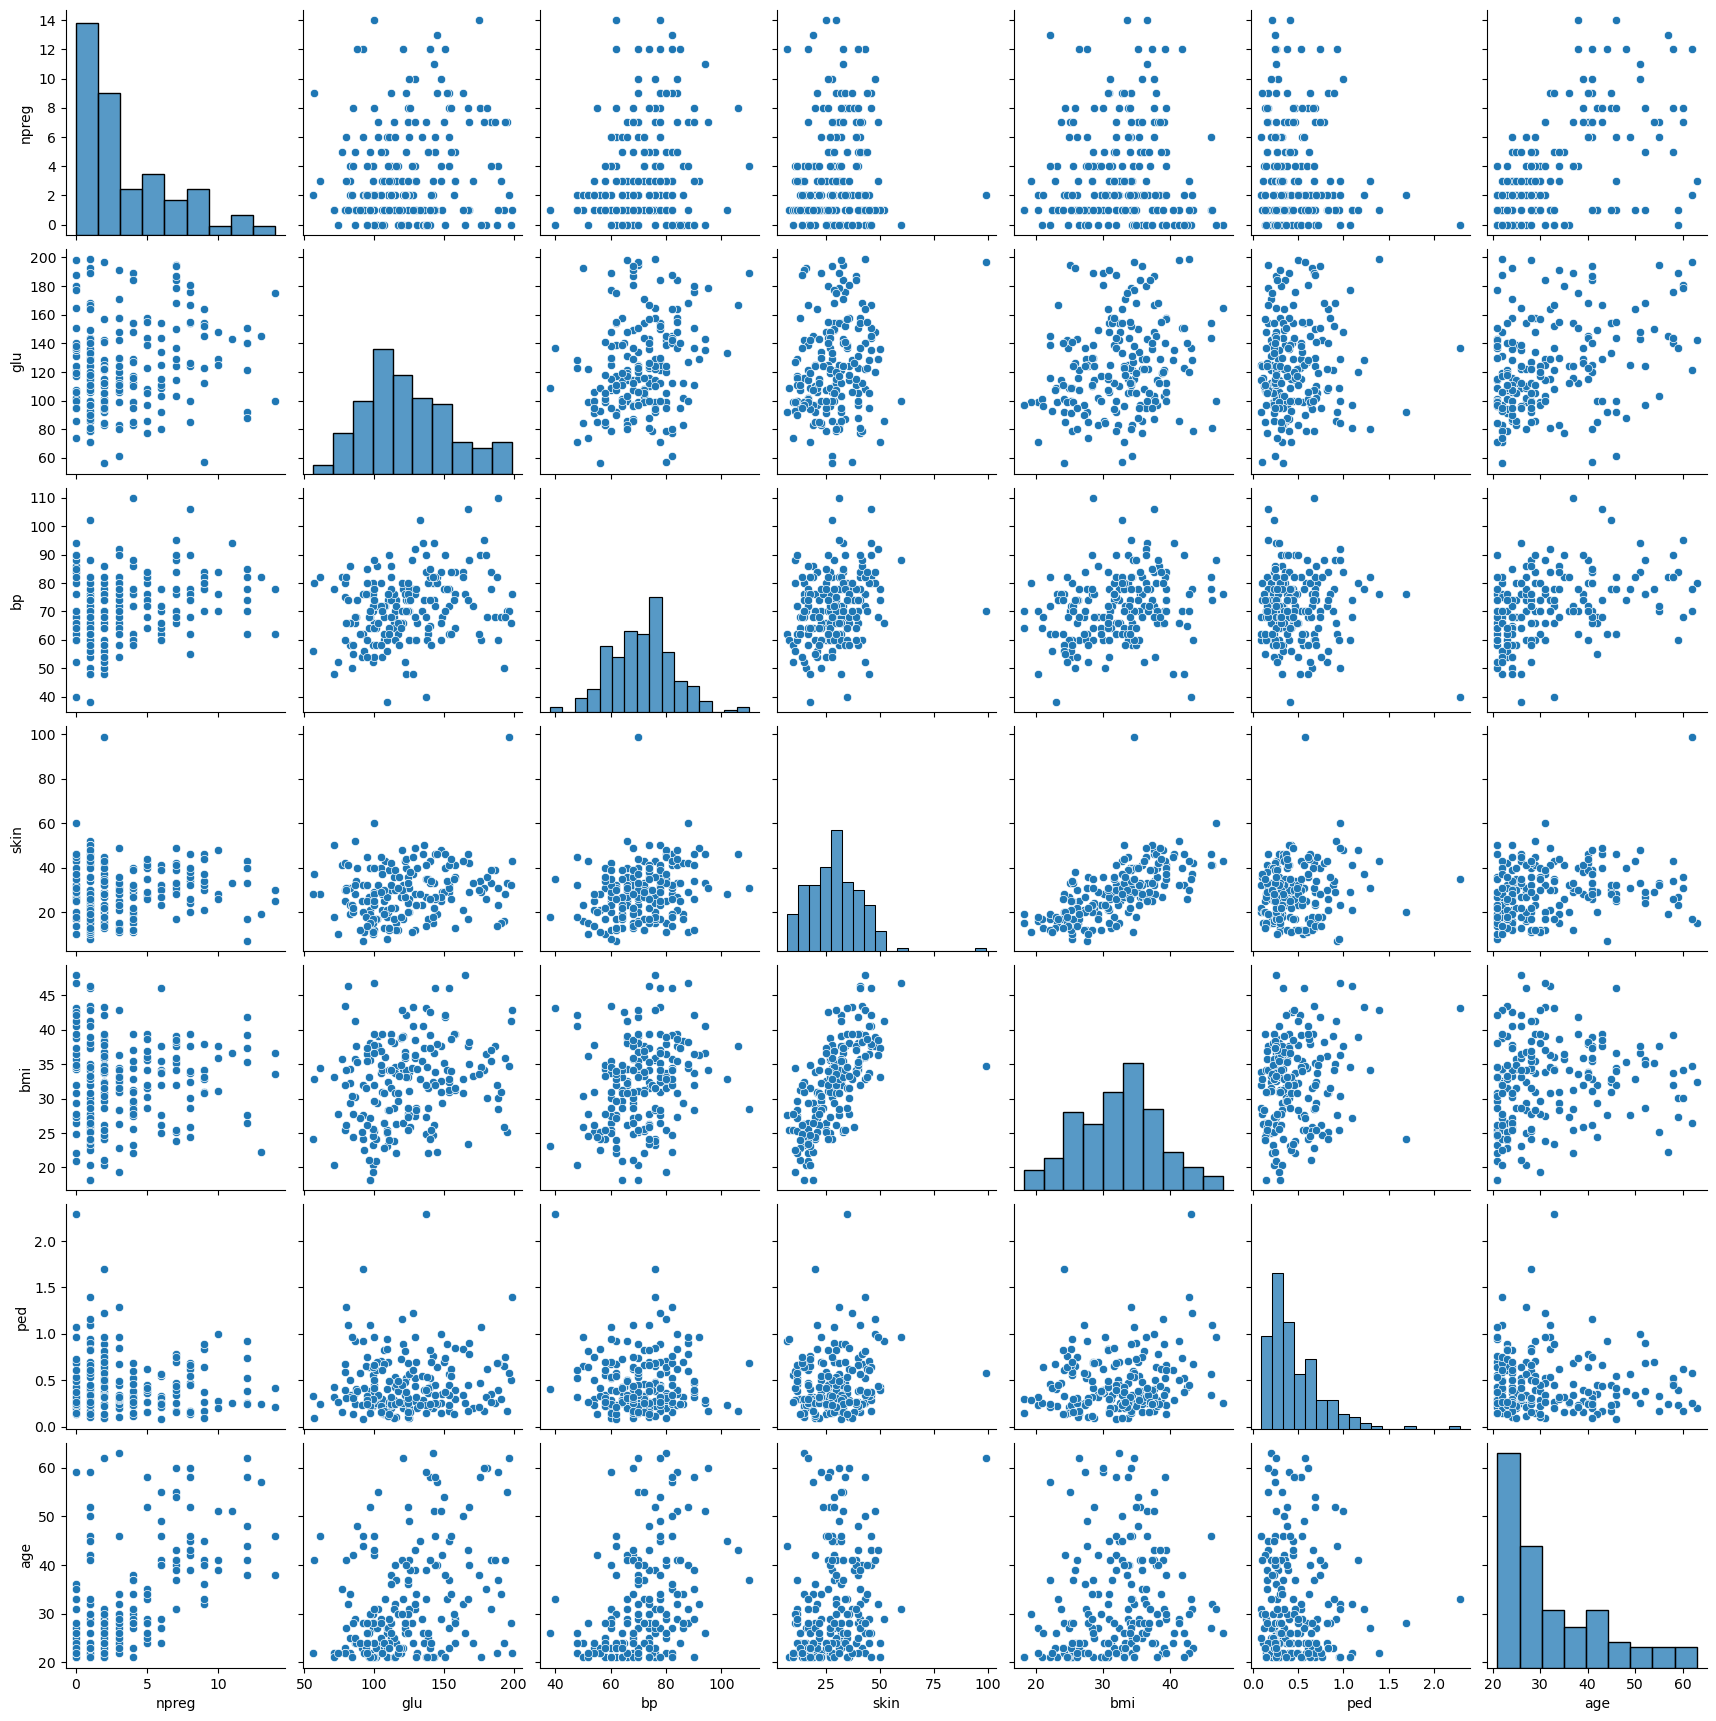

In [70]:
sns.pairplot(df)

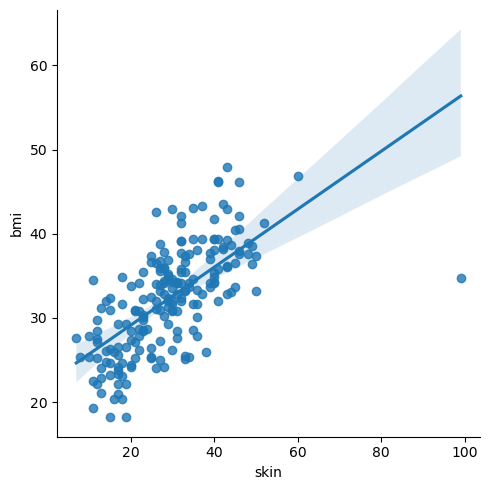

In [77]:
sns.lmplot(data=df,x='skin',y='bmi')
# It seems that the 'skin' and 'bmi' variables have an approximate linear relationship

# Splitting the data & training

In [80]:
# Split the data into training and testing sets for supervised learning
# skin represents the input feature (independent variable) 'x'
# bmi represents the output feature (dependent variable) 'y'

x = df['bmi']
y = df['skin']

# The train_test_split function divides the data into training and testing sets for both 'x' and 'y'
# The resulting variables X_train, X_test, y_train, and y_test contain the split data
# The value 0.3 means that 30% of the data will be used for testing
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

# Create an instance of a LinearRegression() model named 'LR'
LR = LinearRegression()

# Train the LinearRegression model on the training data
# 'values.reshape(-1, 1)' reshapes the input data to match the expected format for the model
LR.fit(X_train.values.reshape(-1, 1), y_train.values)


LinearRegression()

# Print out the coefficients of the model

In [82]:
print('Coefficients: \n', LR.coef_)
#for every one-unit increase in BMI, the model predicts an increase of
#approximately 1.26958757 units in skin fold thickness.

Coefficients: 
 [1.26958757]


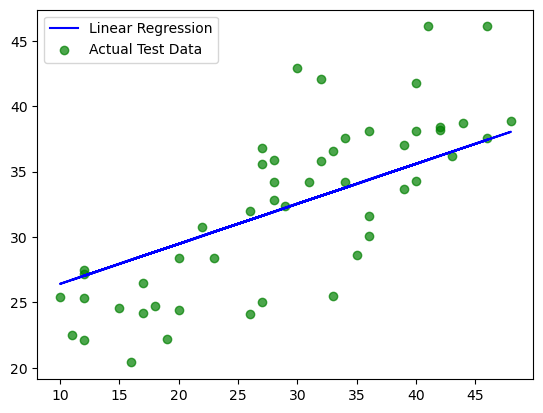

In [73]:
# Predict 'bmi' values using the trained model
# The trained LinearRegression model (LR) is used to predict 'bmi' values for the testing input 'x_test'
# The 'x_test' values are reshaped to match the expected input format of the model
prediction = LR.predict(x_test.values.reshape(-1, 1))

# Plot the Linear Regression prediction line against actual test data
plt.plot(x_test, prediction, label='Linear Regression', color='b')
plt.scatter(x_test, y_test, label='Actual Test Data', color='g', alpha=0.7)
plt.legend()
plt.show()

# Model Evaluation

In [74]:
# Model Interpretation
# Use the trained model to predict BMI values for the test data
predicted_bmi = LR.predict(x_test.values.reshape(-1, 1))

# Calculate R-squared, a measure of how well the model's predictions fit the actual data
# R-squared ranges from 0 to 1; higher values indicate a better fit
r_squared = LR.score(x_test.values.reshape(-1, 1), y_test.values)

# Calculate Mean Absolute Error (MAE), the average absolute difference between predicted and actual values
# Smaller MAE indicates better model accuracy
mae = mean_absolute_error(y_test.values, predicted_bmi)

# Calculate Mean Squared Error (MSE), the average squared difference between predicted and actual values
# Smaller MSE indicates better model accuracy
mse = mean_squared_error(y_test.values, predicted_bmi)

print(f"Model R-squared: {r_squared:.3f}")
print(f"Mean Absolute Error: {mae:.3f}")
print(f"Mean Squared Error: {mse:.3f}")

Model R-squared: 0.541
Mean Absolute Error: 3.512
Mean Squared Error: 19.973


# In summary:

An R-squared value of 0.541 suggests that the model explains a moderate amount of the variability in skin fold thickness using BMI.

The MAE of 3.512 indicates that the average absolute difference between predicted and actual skin fold thickness is about 3.512 units.

The MSE of 19.973 represents the average squared difference between predicted and actual skin fold thickness values.

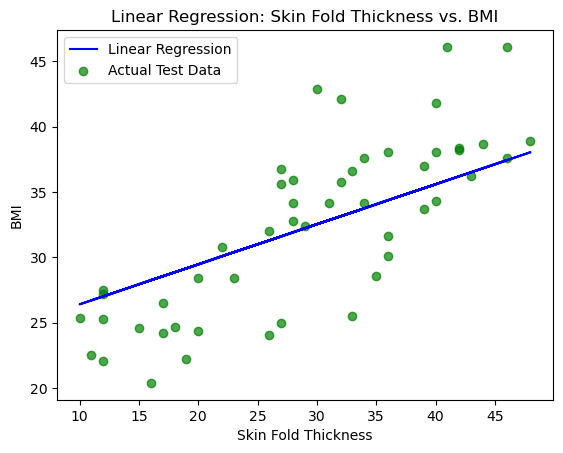

In [75]:
# Model Interpretation and Visualization
plt.plot(x_test, prediction, label='Linear Regression', color='b')
plt.scatter(x_test, y_test, label='Actual Test Data', color='g', alpha=0.7)
plt.xlabel('Skin Fold Thickness')
plt.ylabel('BMI')
plt.legend()
plt.title('Linear Regression: Skin Fold Thickness vs. BMI')
plt.show()

In [76]:
# Predict BMI for women with skin fold 50
# Use the trained LinearRegression model to predict BMI for a given skin fold thickness of 50
# The model expects an input in the shape (num_samples, num_features), so we use np.array([[50]])
predicted_bmi = LR.predict(np.array([[50]]))

# Print the predicted BMI for women with skin fold 50
# The [0] indexing is used because 'predicted_bmi' is an array with one element
print(f"Predicted BMI for women with skin fold 50: {predicted_bmi[0]:.2f}\n")

Predicted BMI for women with skin fold 50: 38.66



# Conclusion and Insights

The linear regression model provides a moderate fit to the data,
indicating that skin fold thickness can give some insight into predicting BMI.
However, the model's performance could be improved by considering additional features
and exploring more advanced regression techniques.

